# Scrap Twitter Data

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Manuel
[nltk_data]     Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import re
import csv
import pandas as pd
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from msedge.selenium_tools import Edge, EdgeOptions
from collections import Counter
from nltk.corpus import stopwords
import nltk 

In [2]:
#setting up selenium to function
options = EdgeOptions()
options.use_chromium = True
driver = Edge(options=options)

C:\Users\Manuel Thomas\AppData\Local\Temp\ipykernel_25280\875207683.py:3: DeprecationWarning: Selenium Tools for Microsoft Edge is deprecated. Please upgrade to Selenium 4 which has built-in support for Microsoft Edge (Chromium): https://docs.microsoft.com/en-us/microsoft-edge/webdriver-chromium/#upgrading-from-selenium-3
  driver = Edge(options=options)


In [3]:
#access the login
driver.get("https://www.twitter.com/login")

In [4]:
#add login details
user = input("Enter your email:")
driver.maximize_window()
sleep(5)
username = driver.find_element_by_xpath('//input[@name="text"]')
username.send_keys(user)
username.send_keys(Keys.RETURN)
sleep(3)

In [5]:
#input the password
my_password=getpass()

In [6]:
#login to your account using the password
password = driver.find_element_by_xpath('//input[@name="password"]')
password.send_keys(my_password)
password.send_keys(Keys.RETURN)
sleep(3)

In [11]:
#If there is an ads setting blocking the page use the following
#submit_button = driver.find_elements_by_xpath('//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[2]/div[2]/div[2]')[0]
#submit_button.click()
#sleep(3)

In [7]:
#search for the keyword specifying the dates

keyword="Pandemic until:2022-01-31 since:2022-01-01"
search_input = driver.find_element_by_xpath('//input[@aria-label="Search query"]')
search_input.send_keys(keyword)
search_input.send_keys(Keys.RETURN)
sleep(1)

# navigate to historical 'latest' tab so that you have considerable amount of tweet
driver.find_element_by_link_text('Latest').click()

In [ ]:
# scrap tweets into a dictionary according to the reqquirements
articles = []
last_position = driver.execute_script("return window.pageYOffset;")
scrolling = True

while scrolling:
    tweets = driver.find_elements_by_xpath('//div[@id="react-root"]//article')
    for tweet in tweets:

        user = tweet.find_element_by_xpath('.//span').text
        postdate = tweet.find_element_by_xpath('.//time').get_attribute('datetime')

        tweet_text =""
        for tweet in tweet.find_elements_by_xpath('.//span')[4:-4]:
            if not (tweet.text.__contains__("https"))|(bool(re.match("^[0-9]+,", tweet.text))):
                tweet_text = tweet_text + tweet.text
                
            else: break
        
        tweet_text = re.sub(r'\d+$', '', tweet_text)
        length = len(tweet_text)
        article={'username': user, 'date': postdate, 'text': tweet_text.strip(), 'length': length}
        articles.append(article)

    scroll_attempt = 0
    while True:
        # check scroll position
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        sleep(2)
        curr_position = driver.execute_script("return window.pageYOffset;")
        if last_position == curr_position:
            scroll_attempt += 1
            
            # end of scroll region
            if scroll_attempt >= 150:
                scrolling = False
                break
            else:
                sleep(2) # attempt another scroll
        else:
            last_position = curr_position
            break
driver.close()

# close the web driver
#driver.close()

In [36]:
len(articles)

1069

In [38]:
df=pd.DataFrame(articles)

In [ ]:
df.to_csv('tweet.csv',index=False) #save the tweets to excel

# Clean the Tweets

In [50]:
tweets = pd.read_csv("tweet.csv")

In [51]:
tweets.dropna(inplace = True)
tweets = tweets.reset_index(drop=True)

In [52]:
tweets.head()

,username,date,text,length
0,Yilin Wang (she/they),2022-01-30T23:59:56.000Z,@jeeyonshimI wasn't a nap person before the pa...,157
1,molly ◡̈,2022-01-30T23:59:55.000Z,Thank you for keeping me sane last 2020-Oct202...,201
2,Craig Castleberry,2022-01-30T23:59:52.000Z,@VetNationShow@Tom_Neverwinterand 48 othersJan...,141
3,Chan kan,2022-01-30T23:59:52.000Z,"""Thousands gather on Parliament Hill to protes...",243
4,95markr,2022-01-30T23:59:51.000Z,@LettuceRadicalandand@OzraeliAviA lack of lead...,303


In [54]:
#save to different df in order to use them as tables when saving to db

#df with 'name'
name = tweets[['username']]
#df with 'tweet'
tweet=tweets[['username','text']]
#df with 'length'
length=tweets[['text','length']]

# Frequency of Words

In [56]:

words = ' '.join(tweets["text"])


In [109]:
words = re.sub(r'[^A-Za-z\' \-]','',words)
words = words.lower()
s=set(stopwords.words('english'))
words_list =  list(filter(lambda w: not w in s,words.split(" ")))

In [110]:
w_list = [x.strip("-") for x in words_list]

In [108]:
w = ["covid-", "fgj","a-"]
w_new = [x.strip("-") for x in w]
w_new

['covid', 'fgj', 'a']

In [90]:
w_list

['jeeyonshimi',
 'nap',
 'person',
 'pandemic',
 'recovering',
 'covid',
 '',
 'weeks',
 'like',
 'napping',
 'every',
 'day',
 'thank',
 'keeping',
 'sane',
 'last',
 'oct',
 'lives',
 'pause',
 'pandemic',
 'seeing',
 'updates',
 'everyday',
 'felt',
 'like',
 'gift',
 'hell',
 'thank',
 'excited',
 'na',
 'ko',
 'sa',
 'movie',
 'mo',
 'vetnationshowtomneverwinterand',
 '',
 'othersjan',
 '',
 '',
 'year',
 'scale',
 'clearly',
 'prices',
 'started',
 'rise',
 'pandemic',
 'correlation',
 'thousands',
 'gather',
 'parliament',
 'hill',
 'protest',
 'pandemic',
 'measuresthe',
 'globe',
 'mailthe',
 'globe',
 'mailglobeandmailthousands',
 'gather',
 'parliament',
 'hill',
 'protest',
 'pandemic',
 'measuresthousands',
 'gather',
 'parliament',
 'hill',
 'protest',
 'pandemic',
 'measures',
 'lettuceradicalandandozraeliavia',
 'lack',
 'leadership',
 'australian',
 'leaders',
 'yet',
 "can't",
 'try',
 'manage',
 'pandemic',
 'mandatory',
 'vaccinations',
 'yes',
 "i'm",
 'tripple',
 

In [111]:
unique_words = dict(Counter(w_list))
len(unique_words)

7244

In [112]:
unique_words

{'jeeyonshimi': 1,
 'nap': 5,
 'person': 12,
 'pandemic': 1101,
 'recovering': 3,
 'covid': 228,
 '': 1145,
 'weeks': 10,
 'like': 92,
 'napping': 1,
 'every': 28,
 'day': 27,
 'thank': 9,
 'keeping': 7,
 'sane': 1,
 'last': 44,
 'oct': 1,
 'lives': 12,
 'pause': 2,
 'seeing': 3,
 'updates': 1,
 'everyday': 2,
 'felt': 3,
 'gift': 1,
 'hell': 3,
 'excited': 5,
 'na': 1,
 'ko': 2,
 'sa': 3,
 'movie': 2,
 'mo': 1,
 'vetnationshowtomneverwinterand': 1,
 'othersjan': 1,
 'year': 64,
 'scale': 3,
 'clearly': 6,
 'prices': 6,
 'started': 32,
 'rise': 3,
 'correlation': 1,
 'thousands': 7,
 'gather': 6,
 'parliament': 11,
 'hill': 6,
 'protest': 20,
 'measuresthe': 2,
 'globe': 4,
 'mailthe': 2,
 'mailglobeandmailthousands': 2,
 'measuresthousands': 2,
 'measures': 11,
 'lettuceradicalandandozraeliavia': 1,
 'lack': 7,
 'leadership': 3,
 'australian': 3,
 'leaders': 8,
 'yet': 17,
 "can't": 26,
 'try': 17,
 'manage': 3,
 'mandatory': 4,
 'vaccinations': 7,
 'yes': 9,
 "i'm": 27,
 'tripple': 1

In [113]:
unique_words.pop('',None)
unique_words.pop('-',None)



In [114]:
unique_words

{'jeeyonshimi': 1,
 'nap': 5,
 'person': 12,
 'pandemic': 1101,
 'recovering': 3,
 'covid': 228,
 'weeks': 10,
 'like': 92,
 'napping': 1,
 'every': 28,
 'day': 27,
 'thank': 9,
 'keeping': 7,
 'sane': 1,
 'last': 44,
 'oct': 1,
 'lives': 12,
 'pause': 2,
 'seeing': 3,
 'updates': 1,
 'everyday': 2,
 'felt': 3,
 'gift': 1,
 'hell': 3,
 'excited': 5,
 'na': 1,
 'ko': 2,
 'sa': 3,
 'movie': 2,
 'mo': 1,
 'vetnationshowtomneverwinterand': 1,
 'othersjan': 1,
 'year': 64,
 'scale': 3,
 'clearly': 6,
 'prices': 6,
 'started': 32,
 'rise': 3,
 'correlation': 1,
 'thousands': 7,
 'gather': 6,
 'parliament': 11,
 'hill': 6,
 'protest': 20,
 'measuresthe': 2,
 'globe': 4,
 'mailthe': 2,
 'mailglobeandmailthousands': 2,
 'measuresthousands': 2,
 'measures': 11,
 'lettuceradicalandandozraeliavia': 1,
 'lack': 7,
 'leadership': 3,
 'australian': 3,
 'leaders': 8,
 'yet': 17,
 "can't": 26,
 'try': 17,
 'manage': 3,
 'mandatory': 4,
 'vaccinations': 7,
 'yes': 9,
 "i'm": 27,
 'tripple': 1,
 'vaxed':

In [115]:
words_df = pd.DataFrame(unique_words.items())
words_df.rename(columns={0: 'word', 1: 'count'}, inplace=True)


In [116]:
sorted_df = words_df.sort_values(["count"], ascending=False)

In [117]:
sorted_df.reset_index(inplace=True, drop=True)

In [118]:
sorted_df.head()

,word,count
0,pandemic,1101
1,covid,228
2,people,168
3,branch,111
4,us,101


In [150]:
sorted_df.to_csv('word_freq.csv',index=False)

In [156]:
#save df to frequecy
frequency=sorted_df

# Saving Data to Database 'twitter'

In [30]:
import sqlite3

In [31]:
sql_c = sqlite3.connect('twitter')
curs = sql_c.cursor()

In [32]:
curs.execute('CREATE TABLE IF NOT EXISTS name (username)')
sql_c.commit()

In [33]:
curs.execute('CREATE TABLE IF NOT EXISTS tweet (username, text)')
sql_c.commit()

In [34]:
curs.execute('CREATE TABLE IF NOT EXISTS length (text,length)')
sql_c.commit()

In [35]:
curs.execute('CREATE TABLE IF NOT EXISTS frequency (word,count)')
sql_c.commit()

In [36]:
name.to_sql('name', sql_c, if_exists='replace', index = False)

1058

In [37]:
tweet.to_sql('tweet', sql_c, if_exists='replace', index = False)

1058

In [38]:
length.to_sql('length', sql_c, if_exists='replace', index = False)

1058

In [39]:
frequency.to_sql('frequency', sql_c, if_exists='replace', index = False)

7256

In [162]:
conn = sqlite3.connect('twitter')

In [164]:
pd.read_sql('SELECT word FROM frequency', conn)

,word
0,pandemic
1,people
2,covid
3,branch
4,us
...,...
7251,llp
7252,directors
7253,shareholder
7254,employee


# Visualizing the Data

In [1]:
pip install seaborn

In [122]:
import seaborn as sns

In [158]:
frequency[1:30]


,word,count
1,covid,228
2,people,168
3,branch,111
4,us,101
5,like,92
6,get,90
7,jan,90
8,time,77
9,increased,73
10,many,73


In [160]:
# Dropping some uninteresting words:
frequency.loc[23, "count"] = frequency.loc[23, "count"] + frequency.loc[24, "count"]
frequency = frequency.drop([5, 6,10,11,12,13,15,16,21,23,25, 26,27,28,30])
frequency = frequency.sort_values(["count"], ascending=False).reset_index()

<AxesSubplot:title={'center':'Most Frequent Words used with "Pandemic"'}, xlabel='word', ylabel='count'>

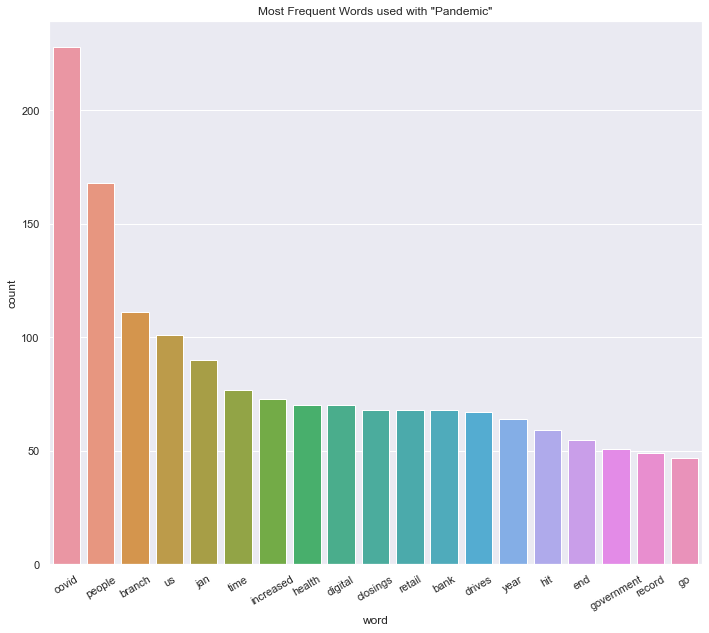

In [161]:
#frequency[1:20].plot(x="word", y="count", kind="bar")

sns.set_theme(style="whitegrid")

sns.set(rc={'figure.figsize':(11.7,10)})



ax = sns.barplot(x="word", y="count", data=frequency[1:20])
ax.set_title('Most Frequent Words used with "Pandemic"')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax

